# AMES HOUSING PRICE PREDICTION

In [1]:
# Import some useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset

ames_train = pd.read_csv("C:\\Users\\User\\Desktop\\ML by me\\house-prices-advanced-regression-techniques\\train.csv")
ames_test = pd.read_csv("C:\\Users\\User\\Desktop\\ML by me\\house-prices-advanced-regression-techniques\\test.csv")

## EXPLORE THE DATA

In [3]:
#Peak at the training data 

pd.set_option("display.max_columns", 100)
ames_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# The training data contains 1460 rows and 81 columns


ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<function matplotlib.pyplot.show(*args, **kw)>

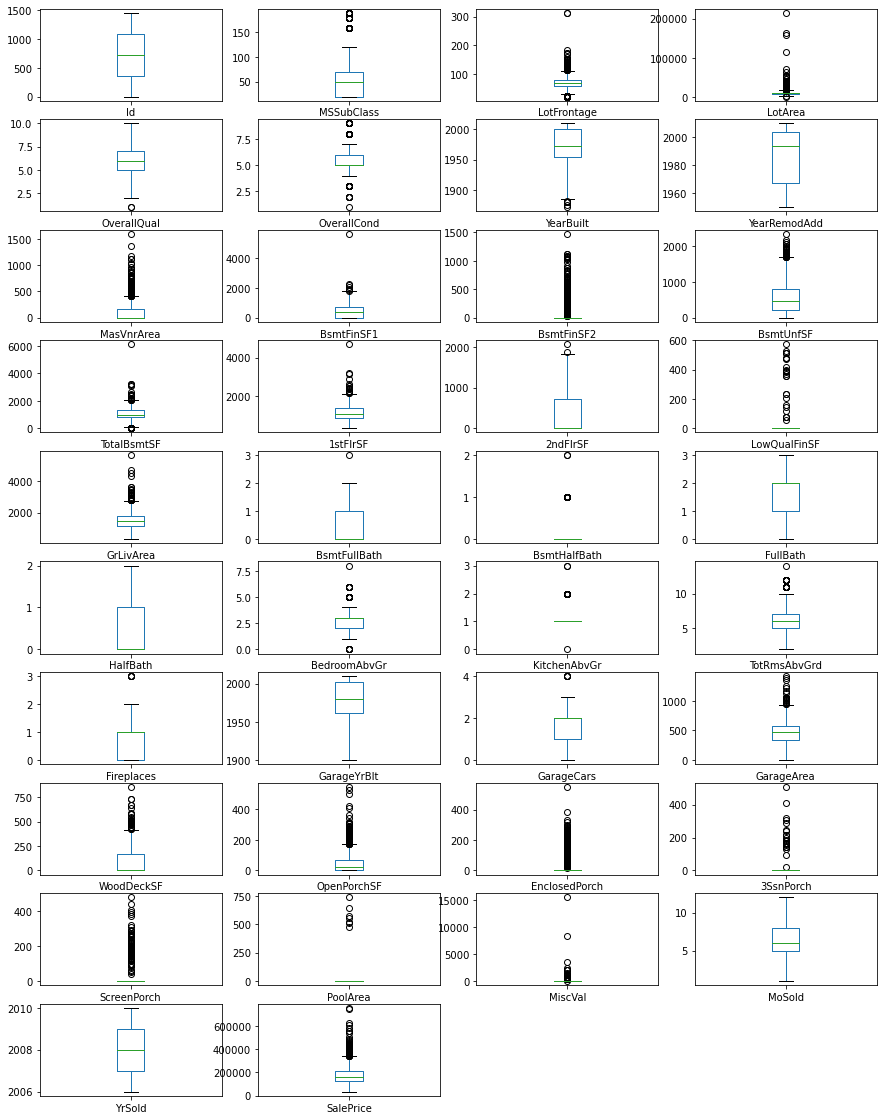

In [6]:
# Plot boxplot of the train dataset to get a sense of outliers that might exist

ames_train.select_dtypes(include=np.number).plot(kind = 'box',
                subplots = True,
                layout = (10, 4,),
                sharex = False,
                figsize = (15, 20))
plt.show

# DEALING WITH OUTLIERS

In [7]:
# Although it is not a good practice to delete ouliers, we'll get rid of some extreme cases

outliers = set()
outliers = outliers.union(set(ames_train[ames_train['LotArea'] > 60000].index.values))
outliers = outliers.union(set(ames_train[ames_train['MasVnrArea'] > 1300].index.values))
outliers = outliers.union(set(ames_train[ames_train['BsmtFinSF1'] > 4000].index.values))
outliers = outliers.union(set(ames_train[ames_train['GrLivArea'] > 4500].index.values))
outliers = outliers.union(set(ames_train[ames_train['GarageArea'] > 4500].index.values))
outliers = outliers.union(set(ames_train[ames_train['1stFlrSF'] > 4000].index.values))
outliers = outliers.union(set(ames_train[ames_train['WoodDeckSF'] > 800].index.values))
outliers = outliers.union(set(ames_train[ames_train['OpenPorchSF'] > 500].index.values))
outliers = outliers.union(set(ames_train[ames_train['EnclosedPorch'] > 400].index.values)) 

print(outliers)

{706, 451, 197, 313, 583, 297, 523, 335, 1328, 1169, 1298, 495, 53, 249}


In [8]:
# Drop outliers

ames_train = ames_train.drop(outliers, axis=0)

### CONCATENATE TRAIN AND TEST DATA

In [9]:
# Before further exploration, concatenate the train and test dataset

ames_df = pd.concat([ames_train,ames_test],ignore_index = True, sort = False)

In [10]:
# Number of rows and column after concatenation

ames_df.shape

(2905, 81)

In [11]:
ames_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
ames_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2905.0,1464.278485,842.101837,1.0,738.00,1467.0,2193.0,2919.0
MSSubClass,2905.0,57.141136,42.520179,20.0,20.00,50.0,70.0,190.0
LotFrontage,2422.0,69.093724,22.650732,21.0,58.25,68.0,80.0,313.0
LotArea,2905.0,9879.952151,4986.320895,1300.0,7450.00,9434.0,11512.0,57200.0
OverallQual,2905.0,6.081928,1.403275,1.0,5.00,6.0,7.0,10.0
OverallCond,2905.0,5.564544,1.112499,1.0,5.00,5.0,6.0,9.0
YearBuilt,2905.0,1971.355938,30.259563,1872.0,1954.00,1973.0,2001.0,2010.0
YearRemodAdd,2905.0,1984.257487,20.897703,1950.0,1965.00,1993.0,2004.0,2010.0
MasVnrArea,2882.0,100.838307,174.801043,0.0,0.00,0.0,164.0,1290.0
BsmtFinSF1,2904.0,437.067149,443.004373,0.0,0.00,367.0,732.0,4010.0


### IDENTIFY MISSING VALUES

In [13]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2905 non-null   int64  
 1   MSSubClass     2905 non-null   int64  
 2   MSZoning       2901 non-null   object 
 3   LotFrontage    2422 non-null   float64
 4   LotArea        2905 non-null   int64  
 5   Street         2905 non-null   object 
 6   Alley          196 non-null    object 
 7   LotShape       2905 non-null   object 
 8   LandContour    2905 non-null   object 
 9   Utilities      2903 non-null   object 
 10  LotConfig      2905 non-null   object 
 11  LandSlope      2905 non-null   object 
 12  Neighborhood   2905 non-null   object 
 13  Condition1     2905 non-null   object 
 14  Condition2     2905 non-null   object 
 15  BldgType       2905 non-null   object 
 16  HouseStyle     2905 non-null   object 
 17  OverallQual    2905 non-null   int64  
 18  OverallC

In [14]:
ames_df.isnull().mean()*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137694
LotFrontage      16.626506
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034423
SaleCondition     0.000000
SalePrice        50.223752
Length: 81, dtype: float64

### Drop columns with large number of missing values ( > 20%)

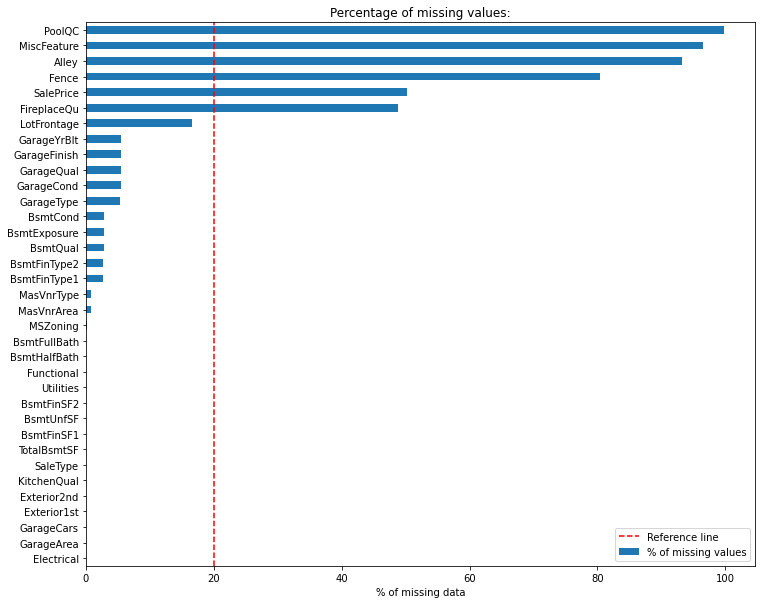

In [15]:
# Horizontal barplot of percentage of missing values

plt.figure(figsize = (12, 10))
(ames_df.loc[:, ames_df.isnull().any()].isnull().sum()*100 / ames_df.shape[0]).sort_values().plot(kind = 'barh', 
                                                                             label = '% of missing values')
plt.axvline(x = 20, color = 'r', linestyle = '--', label = 'Reference line')
plt.legend()
plt.title('Percentage of missing values:')
plt.xlabel('% of missing data')
plt.show()

In [16]:
# Manually dropping column ID and  features which has more then 20% missing values(Target Value).

#Save the 'Id' column
ames_df_ID = ames_df['Id']
ames_train_ID = ames_train['Id']
ames_test_ID = ames_test['Id']

ames_df.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [17]:
# 75 features are left after dropping

ames_df.shape

(2905, 75)

In [18]:
# Get a view of some categorical features

print(ames_train['LotFrontage'].unique())
print(ames_train['MasVnrType'].unique())
print(ames_train['BsmtQual'].unique())
print(ames_train['BsmtCond'].unique())
print(ames_train['BsmtExposure'].unique())
print(ames_train['BsmtFinType1'].unique())
print(ames_train['BsmtFinType2'].unique())
print(ames_df['Utilities'].unique())

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79.  99.  67.  83.  43. 103. 174.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 111.  49.  96.  59.  36.
  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39. 144.
 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
['AllPub' 'NoSeWa' nan]


In [19]:
print(ames_train['Electrical'].unique())
print(ames_train['GarageType'].unique())
print(ames_train['GarageYrBlt'].unique())
print(ames_train['GarageFinish'].unique())
print(ames_train['GarageQual'].unique())
print(ames_train['GarageCond'].unique())

# GarageYrBlt is a date feature

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948. 1974.
 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971. 1923.
 1984. 1926. 1955. 1981. 1986. 1988. 1916. 1932. 1972. 1980. 1924. 1996.
 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927. 1918.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.]
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']


### Replace missing categorical variable with the mode

In [20]:
# Use sklearn simple imputer to replace missing variables
from sklearn.impute import SimpleImputer


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['BsmtFullBath'] = imp.fit_transform(ames_df[['BsmtFullBath']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['BsmtHalfBath'] = imp.fit_transform(ames_df[['BsmtHalfBath']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['BsmtQual'] = imp.fit_transform(ames_df[['BsmtQual']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['BsmtCond'] = imp.fit_transform(ames_df[['BsmtCond']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['BsmtExposure'] = imp.fit_transform(ames_df[['BsmtExposure']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['BsmtFinType1'] = imp.fit_transform(ames_df[['BsmtFinType1']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['BsmtFinType2'] = imp.fit_transform(ames_df[['BsmtFinType2']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['Electrical'] = imp.fit_transform(ames_df[['Electrical']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['GarageType'] = imp.fit_transform(ames_df[['GarageType']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['GarageYrBlt'] = imp.fit_transform(ames_df[['GarageYrBlt']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['GarageFinish'] = imp.fit_transform(ames_df[['GarageFinish']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['GarageQual'] = imp.fit_transform(ames_df[['GarageQual']])


imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['GarageCond'] = imp.fit_transform(ames_df[['GarageCond']])

imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['KitchenQual'] = imp.fit_transform(ames_df[['KitchenQual']])

imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['MasVnrType'] = imp.fit_transform(ames_df[['MasVnrType']])

imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['MSZoning'] = imp.fit_transform(ames_df[['MSZoning']])

imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['SaleType'] = imp.fit_transform(ames_df[['SaleType']])

imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['Utilities'] = imp.fit_transform(ames_df[['Utilities']])

imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['Exterior1st'] = imp.fit_transform(ames_df[['Exterior1st']])

imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['Exterior2nd'] = imp.fit_transform(ames_df[['Exterior2nd']])

imp = SimpleImputer(missing_values = np.nan, strategy="most_frequent")
ames_df['Functional'] = imp.fit_transform(ames_df[['Functional']])

### Replace missing Numerical variable

In [21]:
imp = SimpleImputer(missing_values = np.nan, strategy="mean")
ames_df['BsmtFinSF1'] = imp.fit_transform(ames_df[['BsmtFinSF1']])

imp = SimpleImputer(missing_values = np.nan, strategy="mean")
ames_df['BsmtFinSF2'] = imp.fit_transform(ames_df[['BsmtFinSF2']])

imp = SimpleImputer(missing_values = np.nan, strategy="mean")
ames_df['BsmtUnfSF'] = imp.fit_transform(ames_df[['BsmtUnfSF']])

imp = SimpleImputer(missing_values = np.nan, strategy="mean")
ames_df['TotalBsmtSF'] = imp.fit_transform(ames_df[['TotalBsmtSF']])

imp = SimpleImputer(missing_values = np.nan, strategy="mean")
ames_df['BsmtFullBath'] = imp.fit_transform(ames_df[['BsmtFullBath']])

imp = SimpleImputer(missing_values = np.nan, strategy="mean")
ames_df['BsmtHalfBath'] = imp.fit_transform(ames_df[['BsmtHalfBath']])

imp = SimpleImputer(missing_values = np.nan, strategy="mean")
ames_df['GarageCars'] = imp.fit_transform(ames_df[['GarageCars']])

imp = SimpleImputer(missing_values = np.nan, strategy="mean")
ames_df['GarageArea'] = imp.fit_transform(ames_df[['GarageArea']])

imp = SimpleImputer(missing_values = np.nan, strategy="median")
ames_df['LotFrontage'] = imp.fit_transform(ames_df[['LotFrontage']])

imp = SimpleImputer(missing_values = np.nan, strategy="mean")
ames_df['MasVnrArea'] = imp.fit_transform(ames_df[['MasVnrArea']])

## FEATURE ENGINEERING
Convert the Date features to Age features (YearBuilt, YearRemodAdd, GarageYrBlt)

In [22]:
# Get a sample of yearbuilt feature to ensure its a date feature

ames_df['YearBuilt'].sample(3)

1969    2003
329     1998
1451    1993
Name: YearBuilt, dtype: int64

In [23]:
# Convert the Date features to Age features and drop them
import datetime

ames_df['YearBuilt_Age'] = datetime.datetime.now().year - ames_df['YearBuilt']
ames_df.drop(['YearBuilt'], axis = 1, inplace = True)


ames_df['YearRemodAdd_Age'] = datetime.datetime.now().year - ames_df['YearRemodAdd']
ames_df.drop(['YearRemodAdd'], axis = 1, inplace = True)


ames_df['GarageYrBlt_Age'] = datetime.datetime.now().year - ames_df['GarageYrBlt']
ames_df.drop(['GarageYrBlt'], axis = 1, inplace = True)


ames_df['YrSold_Age'] = datetime.datetime.now().year - ames_df['YrSold']
ames_df.drop(['YrSold'], axis = 1, inplace = True)

In [24]:
# Convert 'GarageYrBlt_Age' from float type to integer

ames_df['GarageYrBlt_Age'] = ames_df[['GarageYrBlt_Age']].astype(int)
type(ames_df[['GarageYrBlt_Age']])

pandas.core.frame.DataFrame

### NEW FEATURES

Create new features 
- 'TotFlrSF' from 1stFlrSF and 2ndFlrSF,
- 'TotBsmtFinSF' from BsmtFinSF1 and BsmtFinSF2
- 'TotBathAbvGrd' from FullBath and HalfBath
- 'TotBsmtBath' from BsmtFullBath and BsmtHalfBath


In [25]:
ames_df['TotFlrSF'] = ames_df['1stFlrSF'] + ames_df['2ndFlrSF']
ames_df.drop(['1stFlrSF', '2ndFlrSF'], axis = 1, inplace = True)

ames_df['TotBsmtFinSF'] = ames_df['BsmtFinSF1'] + ames_df['BsmtFinSF2']
ames_df.drop(['BsmtFinSF1', 'BsmtFinSF2'], axis = 1, inplace = True)

ames_df['TotBathAbvGrd'] = ames_df['FullBath'] + ames_df['HalfBath']
ames_df.drop(['FullBath', 'HalfBath'], axis = 1, inplace = True)

ames_df['TotBsmtBath'] = ames_df['BsmtFullBath'] + ames_df['BsmtHalfBath']
ames_df.drop(['BsmtFullBath', 'BsmtHalfBath'], axis = 1, inplace = True)

In [26]:
ames_df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,YearBuilt_Age,YearRemodAdd_Age,GarageYrBlt_Age,YrSold_Age,TotFlrSF,TotBsmtFinSF,TotBathAbvGrd,TotBsmtBath
2764,190,RM,56.0,7745,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,1.5Fin,4,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,TA,TA,No,Unf,Unf,938.0,938.0,GasA,Gd,N,SBrkr,0,1951,4,2,Fa,9,Typ,0,Detchd,Unf,2.0,576.0,TA,TA,P,0,6,28,0,0,0,0,4,WD,Normal,NaN,122,72,29,16,1951,0.0,2,0.0
1028,180,RM,21.0,1477,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,SFoyer,4,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,121.0,630.0,GasA,TA,Y,SBrkr,0,630,1,1,TA,3,Typ,0,Attchd,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,0,4,WD,Normal,80000.0,52,52,52,13,630,509.0,1,1.0
515,60,RL,95.0,11787,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,594.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,660.0,1379.0,GasA,Ex,Y,SBrkr,0,2398,3,1,Gd,8,Typ,1,Attchd,Fin,3.0,834.0,TA,TA,Y,239,60,0,0,0,0,0,8,WD,Normal,315750.0,26,25,26,15,2398,719.0,3,1.0
1404,20,RL,71.0,9204,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,Rec,247.0,1144.0,GasA,TA,Y,SBrkr,0,1144,3,1,TA,6,Typ,0,Detchd,Unf,1.0,336.0,TA,TA,Y,0,88,0,0,0,0,0,8,COD,Normal,124000.0,59,59,60,14,1144,897.0,2,1.0
1122,60,RL,80.0,9828,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,544.0,1128.0,GasA,Ex,Y,SBrkr,0,2020,3,1,Gd,8,Typ,1,Attchd,RFn,2.0,466.0,TA,TA,Y,0,155,0,0,0,0,0,6,WD,Normal,239500.0,27,27,27,13,2020,584.0,3,0.0


#### Check for duplicate Values

In [27]:
ames_df.duplicated().sum()

0

## Correlation of predictor variables with target variable

In [28]:
corr_ames_df = ames_df.corr()

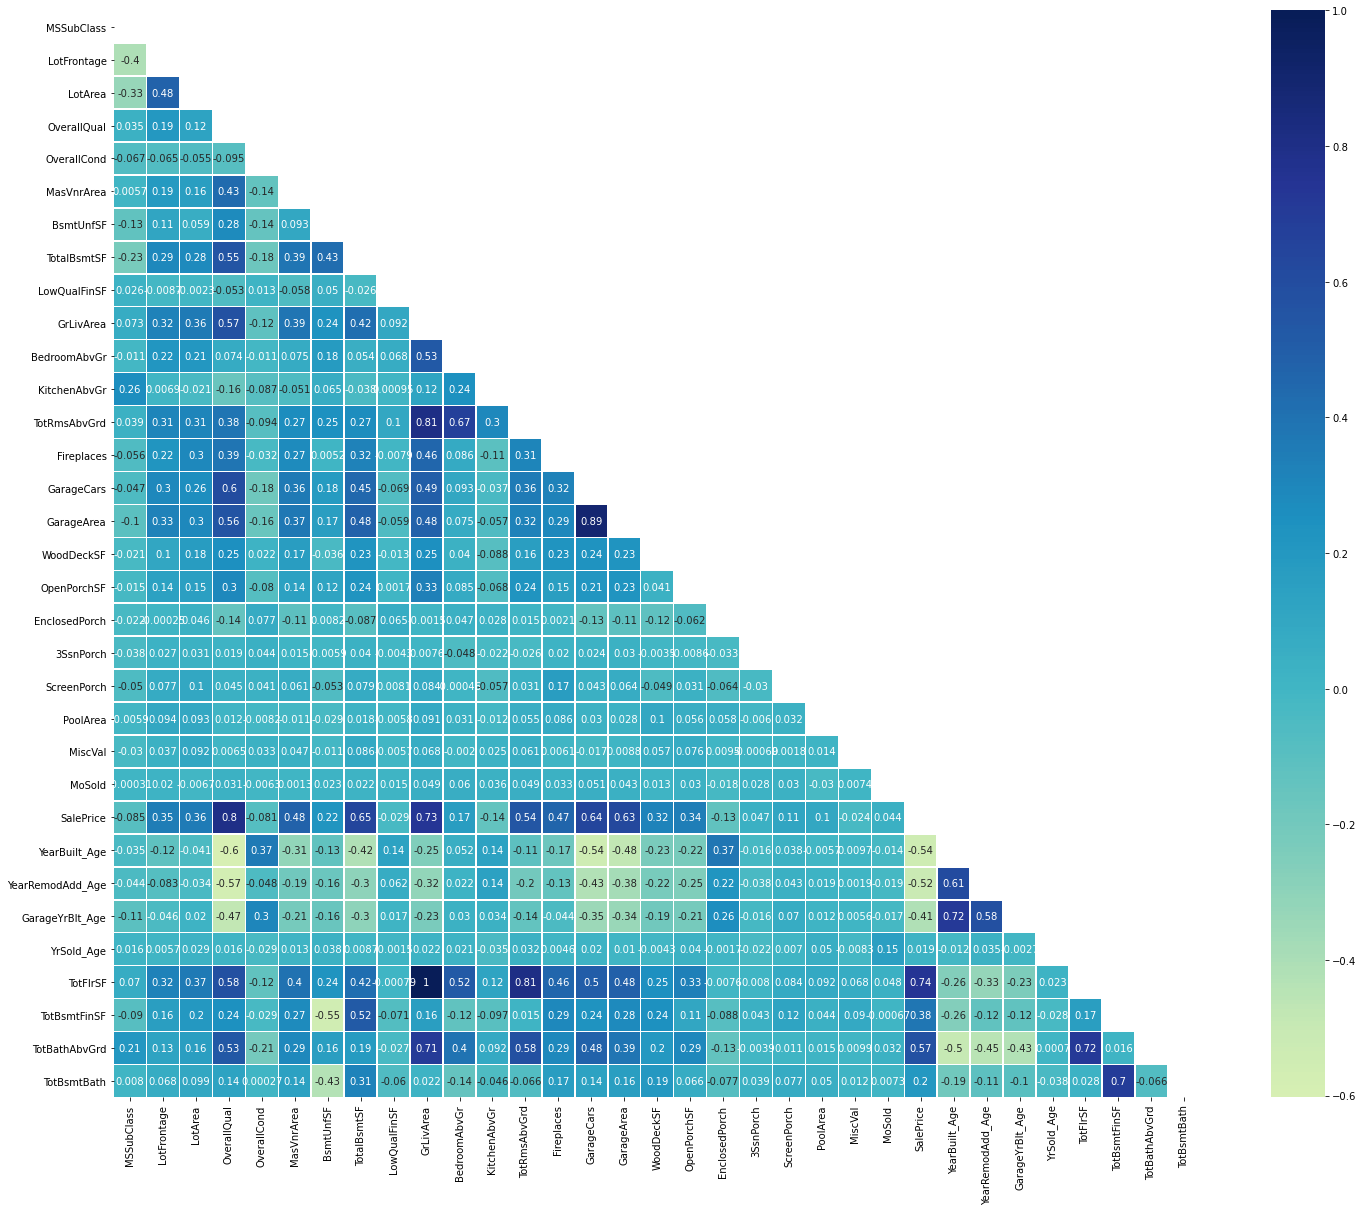

In [29]:
# Correlation Matrix -- Heatmap

f, ax = plt.subplots(figsize=(25, 20))
mask = np.triu(np.ones_like(corr_ames_df, dtype=bool))
cmap = "YlGnBu"
sns.heatmap(corr_ames_df, mask=mask, vmax=1,cmap=cmap, center=0, annot = True,
            square=True, linewidths=.5)
plt.show()



In [30]:
# Correlation of features to target value(SalePrice)

corr_ames_df['SalePrice'].sort_values(ascending = False)

SalePrice           1.000000
OverallQual         0.796138
TotFlrSF            0.740417
GrLivArea           0.731849
TotalBsmtSF         0.647076
GarageCars          0.641924
GarageArea          0.628342
TotBathAbvGrd       0.571435
TotRmsAbvGrd        0.539513
MasVnrArea          0.480057
Fireplaces          0.466270
TotBsmtFinSF        0.376569
LotArea             0.360847
LotFrontage         0.347227
OpenPorchSF         0.341503
WoodDeckSF          0.316979
BsmtUnfSF           0.220886
TotBsmtBath         0.201754
BedroomAbvGr        0.170742
ScreenPorch         0.112616
PoolArea            0.102280
3SsnPorch           0.046928
MoSold              0.044100
YrSold_Age          0.019064
MiscVal            -0.023639
LowQualFinSF       -0.029212
OverallCond        -0.080905
MSSubClass         -0.084635
EnclosedPorch      -0.132452
KitchenAbvGr       -0.136156
GarageYrBlt_Age    -0.412253
YearRemodAdd_Age   -0.516080
YearBuilt_Age      -0.537330
Name: SalePrice, dtype: float64

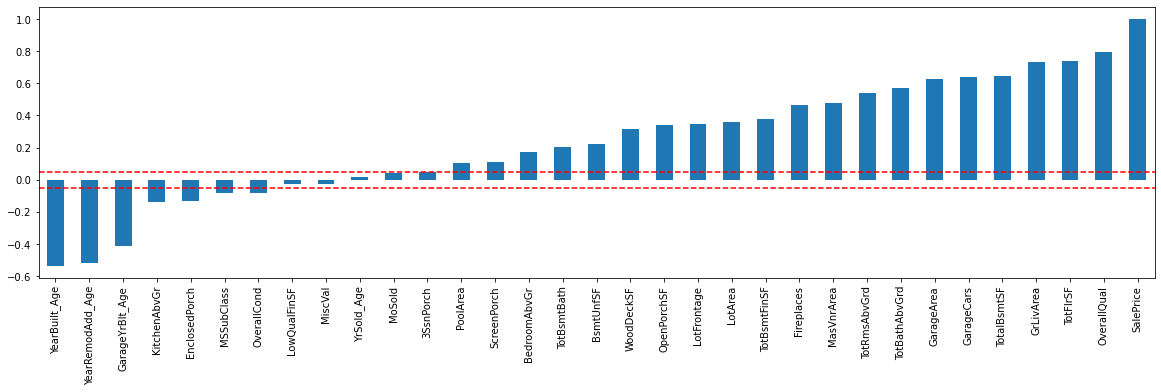

In [31]:
# Barplot of correlation with target value 'sale price'

plt.subplots(figsize = (20, 5))
corr_ames_df['SalePrice'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.05, color = 'red', linestyle = '--')
plt.axhline(y = -0.05, color = 'red', linestyle = '--')
plt.show()

In [32]:
# To check the number of values that are correlated to target feature

#Correlation with target variable
cor_target = abs(corr_ames_df['SalePrice'])

#Selecting correlated features
correlated_features = cor_target[cor_target >= 0.05]
print('Total features: ', len(ames_df.select_dtypes(include = 'number').columns))
print('Amount of correlated features: ', len(correlated_features))

Total features:  33
Amount of correlated features:  28


In [33]:
# Remove target variable which has nans(will be added later)
corr_pop = correlated_features.pop('SalePrice')
print(correlated_features.sort_values(ascending=False))

OverallQual         0.796138
TotFlrSF            0.740417
GrLivArea           0.731849
TotalBsmtSF         0.647076
GarageCars          0.641924
GarageArea          0.628342
TotBathAbvGrd       0.571435
TotRmsAbvGrd        0.539513
YearBuilt_Age       0.537330
YearRemodAdd_Age    0.516080
MasVnrArea          0.480057
Fireplaces          0.466270
GarageYrBlt_Age     0.412253
TotBsmtFinSF        0.376569
LotArea             0.360847
LotFrontage         0.347227
OpenPorchSF         0.341503
WoodDeckSF          0.316979
BsmtUnfSF           0.220886
TotBsmtBath         0.201754
BedroomAbvGr        0.170742
KitchenAbvGr        0.136156
EnclosedPorch       0.132452
ScreenPorch         0.112616
PoolArea            0.102280
MSSubClass          0.084635
OverallCond         0.080905
Name: SalePrice, dtype: float64


## TEST FOR MULTICOLLINEARITY

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Define a function to get VIF
def calculate_vif(vif_features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = vif_features.columns
    vif_data["VIF"] = [variance_inflation_factor(vif_features.values, i) for i in range(len(vif_features.columns))]
    return vif_data

# vif_features = ames_train.select_dtypes(include='number')
vif_features = ames_df[correlated_features.index]
calculate_vif(vif_features)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,MSSubClass,4.485372
1,LotFrontage,18.569386
2,LotArea,7.797374
3,OverallQual,48.218751
4,OverallCond,31.640317
5,MasVnrArea,1.845043
6,BsmtUnfSF,inf
7,TotalBsmtSF,inf
8,GrLivArea,1267.380475
9,BedroomAbvGr,28.881157


In [35]:
# Manually removing highly collinear columns(VIF > 10)

vif_features.drop(['OverallCond', 'BsmtUnfSF', 'KitchenAbvGr', 'GarageArea', 'GarageYrBlt_Age'], axis=1, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
print(vif_features.columns)
print(vif_features.shape)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea',
       'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'YearBuilt_Age',
       'YearRemodAdd_Age', 'TotFlrSF', 'TotBsmtFinSF', 'TotBathAbvGrd',
       'TotBsmtBath'],
      dtype='object')
(2905, 22)


# CATEGORICAL FEATURES ASSOCIATION WITH TARGET VARIABLE

In [37]:
from scipy.stats import chi2_contingency

def cramers_v(chi_table):
    "calculate Cramers V statistic for categorial-categorial association"
    chi2 = chi2_contingency(chi_table)[0]
    n = chi_table.sum()
    phi2 = chi2 / n
    r, k = chi_table.shape
    #Bias correction for cramers_v
    phi2cor = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcor = r - ((r-1)**2)/(n-1)
    kcor = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2cor / min((kcor-1), (rcor-1)))

cramers_values = []
obj_columns = ames_df.select_dtypes(include = object).columns

for column in obj_columns:
    chi_table = pd.crosstab(ames_df[column], ames_df['SalePrice'])
    cramers_values.append(cramers_v(chi_table.values))
# print(chi_table)
    
cramers_values_df = pd.DataFrame()
cramers_values_df['feature'], cramers_values_df['value'] = obj_columns, cramers_values
print(cramers_values_df)

          feature     value
0        MSZoning  0.282131
1          Street  0.275334
2        LotShape  0.342219
3     LandContour  0.091262
4       Utilities  0.000000
5       LotConfig  0.145562
6       LandSlope  0.000000
7    Neighborhood  0.173257
8      Condition1  0.000000
9      Condition2  0.301099
10       BldgType  0.000000
11     HouseStyle  0.000000
12      RoofStyle  0.000000
13       RoofMatl  0.000000
14    Exterior1st  0.000000
15    Exterior2nd  0.000000
16     MasVnrType  0.268410
17      ExterQual  0.458269
18      ExterCond  0.314998
19     Foundation  0.222979
20       BsmtQual  0.396008
21       BsmtCond  0.333825
22   BsmtExposure  0.281164
23   BsmtFinType1  0.000000
24   BsmtFinType2  0.000000
25        Heating  0.333949
26      HeatingQC  0.000000
27     CentralAir  0.328062
28     Electrical  0.133526
29    KitchenQual  0.439292
30     Functional  0.000000
31     GarageType  0.047339
32   GarageFinish  0.369402
33     GarageQual  0.151267
34     GarageCond  0

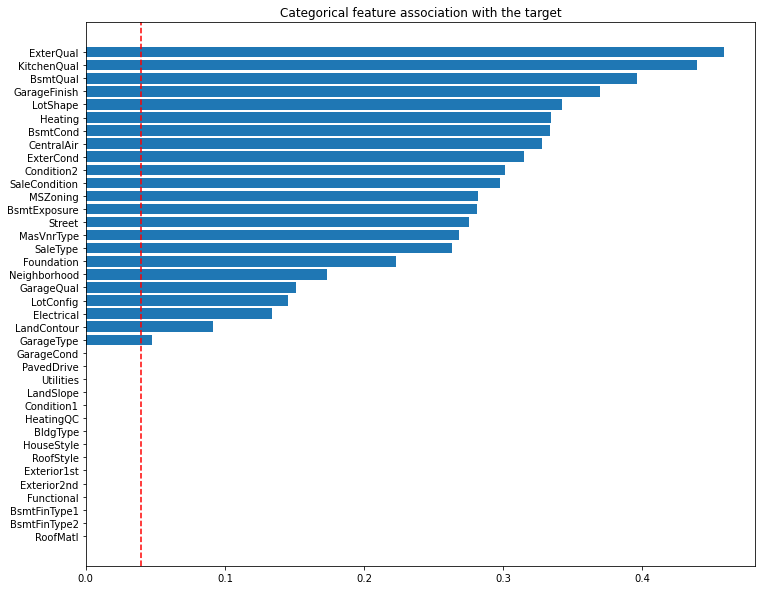

In [38]:
# Horizontal Barplot of categorical features association with target

plt.subplots(figsize = (12, 10))
plt.barh(cramers_values_df[cramers_values_df['value'] >= 0].sort_values(['value'])['feature']
        ,cramers_values_df[cramers_values_df['value'] >= 0].sort_values(['value'])['value'])
plt.axvline(x = 0.04, color = 'red', linestyle = '--', label = 'Reference line')
plt.title("Categorical feature association with the target")
plt.show()

In [39]:
# Select correlated features using > .04 threshold
cramers_values_df = cramers_values_df[cramers_values_df['value'] > 0.04]['feature'].to_list()
len(cramers_values_df)

23

In [40]:
# Final dataset
# Concatenate VIF FEATURES AND CRAMERS FEATURES
# Append SalePrice

ames_train1 = pd.concat([ames_df[cramers_values_df], ames_df[vif_features.columns]], axis = 1)
ames_train1 = ames_train1.assign(SalePrice=ames_df.SalePrice)
ames_train1.tail()

,MSZoning,Street,LotShape,LandContour,LotConfig,Neighborhood,Condition2,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,Heating,CentralAir,Electrical,KitchenQual,GarageType,GarageFinish,GarageQual,SaleType,SaleCondition,MSSubClass,LotFrontage,LotArea,OverallQual,MasVnrArea,TotalBsmtSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,YearBuilt_Age,YearRemodAdd_Age,TotFlrSF,TotBsmtFinSF,TotBathAbvGrd,TotBsmtBath,SalePrice
2900,RM,Pave,Reg,Lvl,Inside,MeadowV,Norm,None,TA,TA,CBlock,TA,TA,No,GasA,Y,SBrkr,TA,Attchd,Unf,TA,WD,Normal,160,21.0,1936,4,0.0,546.0,1092,3,5,0,0.0,0,0,0,0,0,52,52,1092,0.0,2,0.0,NaN
2901,RM,Pave,Reg,Lvl,Inside,MeadowV,Norm,None,TA,TA,CBlock,TA,TA,No,GasA,Y,SBrkr,TA,CarPort,Unf,TA,WD,Abnorml,160,21.0,1894,4,0.0,546.0,1092,3,6,0,1.0,0,24,0,0,0,52,52,1092,252.0,2,0.0,NaN
2902,RL,Pave,Reg,Lvl,Inside,Mitchel,Norm,None,TA,TA,CBlock,TA,TA,No,GasA,Y,SBrkr,TA,Detchd,Unf,TA,WD,Abnorml,20,160.0,20000,5,0.0,1224.0,1224,4,7,1,2.0,474,0,0,0,0,62,26,1224,1224.0,1,1.0,NaN
2903,RL,Pave,Reg,Lvl,Inside,Mitchel,Norm,None,TA,TA,PConc,Gd,TA,Av,GasA,Y,SBrkr,TA,Attchd,Unf,TA,WD,Normal,85,62.0,10441,5,0.0,912.0,970,3,6,0,0.0,80,32,0,0,0,30,30,970,337.0,1,1.0,NaN
2904,RL,Pave,Reg,Lvl,Inside,Mitchel,Norm,BrkFace,TA,TA,PConc,Gd,TA,Av,GasA,Y,SBrkr,TA,Attchd,Fin,TA,WD,Normal,60,74.0,9627,7,94.0,996.0,2000,3,9,1,3.0,190,48,0,0,0,29,28,2000,758.0,3,0.0,NaN


In [41]:
# Final data set has 46 features

ames_train1.shape

(2905, 46)

# Split Dataset

In [42]:
# Initial split

y = ames_train1["SalePrice"]
X = ames_train1.drop("SalePrice", axis = 1)

In [43]:
X.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating',
       'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish',
       'GarageQual', 'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'MasVnrArea', 'TotalBsmtSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea',
       'YearBuilt_Age', 'YearRemodAdd_Age', 'TotFlrSF', 'TotBsmtFinSF',
       'TotBathAbvGrd', 'TotBsmtBath'],
      dtype='object')

### Handle Categorical variables

In [44]:
# Nominal Categorical Variables

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.preprocessing import StandardScaler


# Ordinal Catergorical Variables

ord_mapping = [
    ['Po','Fa', 'TA', 'Gd', 'Ex'],               #ExterQual
    ['Po','Fa', 'TA', 'Gd', 'Ex'],               #ExterCond
    ['Fa', 'TA', 'Gd', 'Ex'],                    #BsmtQual
    ['Po','Fa', 'TA', 'Gd'],                     #BsmtCond
    ['No', 'Mn', 'Av', 'Gd'],                    #BsmtExposure
    ['Fa', 'TA', 'Gd', 'Ex'],                    #KitchenQual
    ['Po','Fa', 'TA', 'Gd', 'Ex'],               #GarageQual
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],             #OverallQual
] 
    
ord_features = [
    'ExterQual',  'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'KitchenQual', 'GarageQual', 'OverallQual'
]

nom_features = [
    'MSZoning', 'Street','LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition2', 'MasVnrType', 
    'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'
]


column_trans = ColumnTransformer([
    ('ranked_category', OrdinalEncoder(dtype = 'int', categories = ord_mapping), ord_features),
    ('scale', StandardScaler(), make_column_selector(dtype_include = np.number)),
    ('unranked_category', OneHotEncoder(dtype= 'int'), nom_features)
    ],remainder='drop')

X = column_trans.fit_transform(X)

In [45]:
# Final split into train and test

X_train, y_train = X[:1446], y[:1446]
X_test, y_test = X[1446:], y[1446:]

In [46]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_train.shape

(1446, 130)

In [47]:
y_train.describe()

count      1446.000000
mean     179970.502075
std       78213.625306
min       35311.000000
25%      129900.000000
50%      162250.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### CHECK DISTRIBUTION OF TARGET VARIABLE

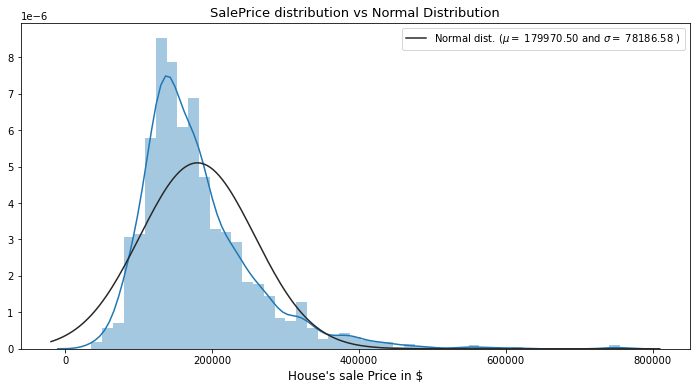

In [48]:
# Plotting the target variable to check for skewness
from scipy.stats import norm

targetVariable = y_train
(mu, sigma) = norm.fit(targetVariable)

plt.figure(figsize = (12,6))
sns.distplot(targetVariable, kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.show()

## ENCODING TARGET VARIABLE USING LOG SCALING

In [49]:
# Since target is skewed to the left we use np.log to ensure it is normal distribution

y_train = np.log1p(y_train)

Text(0.5, 1.0, 'Log transformed Sale Price Distribution')

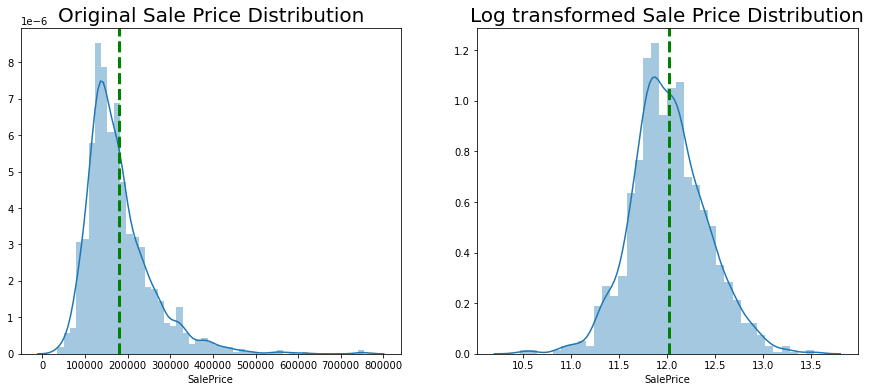

In [50]:
# Compare Log transformed distribution with original saleprice distribution

plt.figure(figsize = (15,6))
plt.subplots_adjust(hspace=0.3)

ax1 = plt.subplot(1,2,1)
sns.distplot(targetVariable, kde=True)
plt.axvline(targetVariable.mean(), color='g', linestyle='--', linewidth=3)
plt.title('Original Sale Price Distribution',fontsize=20)


ax3 = plt.subplot(1,2,2)
sns.distplot(y_train, kde=True)
plt.axvline(y_train.mean(), color='g', linestyle='--', linewidth=3)
plt.title('Log transformed Sale Price Distribution',fontsize=20)

# MODELLING

### Define Metrics to use

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Define Metrics
def rmse(y, y_pred):
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return print('RMSE:', rmse)

def mae(y, y_pred):
    mae = mean_squared_error(y, y_pred)
    return print('MAE:', mae)

def r2(y, y_pred):
    r2 = r2_score(y, y_pred)
    return print('r2 score:', r2)

# Define a cross validation strategy
def rmse_cv(model):
    scores = cross_val_score(model, X_train, y_train,
                        scoring="neg_mean_squared_error",
                         cv=4)
    rmse_cv_scores = np.sqrt(-scores)
    return print("%0.2f RMSE score(accuracy) with a std of %0.2f" % (rmse_cv_scores.mean(), rmse_cv_scores.std()))

## OLS regression

In [52]:
from sklearn.linear_model import LinearRegression


# Initialize, fit and Predict
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
x_pred = lin_reg.predict(X_train)


r2(y_train, x_pred)
rmse(y_train, x_pred)
mae(y_train, x_pred)
rmse_cv(lin_reg)

r2 score: 0.9248069942982513
RMSE: 0.10825378451994419
MAE: 0.011718881862890508
104069478.92 RMSE score(accuracy) with a std of 92022180.24


## Ridge Regression

In [59]:
from sklearn.linear_model import Ridge

# Fit
ridge_reg = Ridge(random_state=42)
ridge_reg.fit(X_train, y_train)
x_pred_ridge = ridge_reg.predict(X_train)

r2(y_train, x_pred_ridge)
rmse(y_train, x_pred_ridge)
mae(y_train, x_pred_ridge)
rmse_cv(ridge_reg)

r2 score: 0.9248390651059946
RMSE: 0.10823069622504201
MAE: 0.011713883605357323
0.12 RMSE score(accuracy) with a std of 0.01


#### GRID SEARCH FOR RIDGE REGRESSION

In [62]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[4, 5, 5.2, 5.4, 5.6, 5.8, 6, 7, 8],
             'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# define the grid search
Ridge_reg= GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error', cv=4, verbose=True)

#fit the grid search
Ridge_reg.fit(X_train,y_train)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
print(Ridge_reg.best_score_)
print(Ridge_reg.best_params_)

ridge_best_model = Ridge_reg.best_estimator_
ridge_best_model.fit(X_train,y_train)
x_pred_Ridge = ridge_best_model.predict(X_train)

r2(y_train, x_pred_Ridge)
rmse(y_train, x_pred_Ridge)
mae(y_train, x_pred_Ridge)
rmse_cv(Ridge_reg.best_estimator_)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:  1.6min finished


Ridge(alpha=8, random_state=42, solver='lsqr')
-0.014608050799357706
{'alpha': 8, 'solver': 'lsqr'}
r2 score: 0.9225880895592964
RMSE: 0.10983942688631304
MAE: 0.012064699698713708
0.12 RMSE score(accuracy) with a std of 0.00


## Elastic Net

In [63]:
from sklearn.linear_model import ElasticNet

# Fit
elastic_net = ElasticNet(random_state=42)
elastic_net.fit(X_train, y_train)
x_pred_elastic_net = elastic_net.predict(X_train)

r2(y_train, x_pred_elastic_net)
rmse(y_train, x_pred_elastic_net)
mae(y_train, x_pred_elastic_net)
rmse_cv(elastic_net)

r2 score: 0.0
RMSE: 0.3947792934622845
MAE: 0.15585069054658057
0.39 RMSE score(accuracy) with a std of 0.02


#### GRID SEARCH FOR ELASTIC NET

In [64]:
parameter_s = {'alpha': [1e-3, 1.3e-3, 1.5e-1],
              'l1_ratio': [0.3, 0.4, 0.5, 0.7],
            'max_iter': [1000, 1500, 2000]}

# define the grid search
Elastic_net= GridSearchCV(elastic_net, parameter_s, scoring='neg_mean_squared_error', cv=4, verbose=True)

#fit the grid search to get the best_estimator
Elastic_net.fit(X_train,y_train)

# best estimator
print(Elastic_net.best_estimator_)

# best model
print(Elastic_net.best_score_)
print(Elastic_net.best_params_)

EN_best_model = Elastic_net.best_estimator_
EN_best_model.fit(X_train,y_train)
x_pred_EN = EN_best_model.predict(X_train)

r2(y_train, x_pred_EN)
rmse(y_train, x_pred_EN)
mae(y_train, x_pred_EN)
rmse_cv(Elastic_net.best_estimator_)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   28.6s finished


ElasticNet(alpha=0.001, l1_ratio=0.3, random_state=42)
-0.014814218015648018
{'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 1000}
r2 score: 0.9216709889656393
RMSE: 0.1104881462399286
MAE: 0.01220763045953585
0.12 RMSE score(accuracy) with a std of 0.00


## Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

# Fit
rdt_reg = RandomForestRegressor(random_state=42)
rdt_reg.fit(X_train, y_train)
x_pred_rdt_reg = rdt_reg.predict(X_train)

r2(y_train, x_pred_rdt_reg)
rmse(y_train, x_pred_rdt_reg)
mae(y_train, x_pred_rdt_reg)
rmse_cv(rdt_reg)

r2 score: 0.9832256126483497
RMSE: 0.05113022444944394
MAE: 0.0026142998522505154
0.14 RMSE score(accuracy) with a std of 0.00


In [70]:
for name, score in zip(ames_train1.columns, rdt_reg.feature_importances_):
    print(name, score)   

MSZoning 0.002591167425286875
Street 0.004289486002020661
LotShape 0.006863058295302998
LandContour 0.0014226958054953348
LotConfig 0.0025240191818539964
Neighborhood 0.004640783360870747
Condition2 0.0004504928278320219
MasVnrType 0.2724741574817786
ExterQual 0.0036625154745860127
ExterCond 0.008535258045002771
Foundation 0.017322933612129287
BsmtQual 0.29320235065842826
BsmtCond 0.0031391897116115814
BsmtExposure 0.057000950751437296
Heating 0.0319779058935686
CentralAir 0.002103153139550113
Electrical 0.0030541224419330156
KitchenQual 0.004508254149405278
GarageType 0.04131621255899761
GarageFinish 0.004147478694287353
GarageQual 0.004604640909873097
SaleType 0.002546113099536346
SaleCondition 0.0006615103819359438
MSSubClass 2.849772907553575e-05
LotFrontage 0.019921039549663393
LotArea 0.011595601806714014
OverallQual 0.09775245736801297
MasVnrArea 0.03050921524331838
TotalBsmtSF 0.004245549219933659
GrLivArea 0.0023215268120455033
BedroomAbvGr 0.0013098871166035647
TotRmsAbvGrd 8

#### GRID SEARCH FOR RANDOM FOREST

In [71]:
# from sklearn.model_selection import GridSearchCV

param_grid = [
  {'n_estimators': [300, 500, 600], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [50, 100, 200]},
  {'bootstrap': [False], 'n_estimators': [300, 500, 600], 'max_features': ['sqrt', 'log2', 'auto'], 
   'max_leaf_nodes': [50, 100, 200]
   },
 ]

grid_search_forest = GridSearchCV(rdt_reg, param_grid,
                                  cv=4,
                                  scoring ='neg_mean_squared_error',
                                  verbose=True,
                                  return_train_score = True)

grid_search_forest.fit(X_train, y_train)

# best estimator
print(grid_search_forest.best_estimator_)

# best model
print(grid_search_forest.best_score_)
print(grid_search_forest.best_params_)

RF_best_model = grid_search_forest.best_estimator_
RF_best_model.fit(X_train,y_train)
x_pred_RF = RF_best_model.predict(X_train)

r2(y_train, x_pred_RF)
rmse(y_train, x_pred_RF)
mae(y_train, x_pred_RF)
rmse_cv(RF_best_model)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 17.2min finished


RandomForestRegressor(bootstrap=False, max_features='sqrt', max_leaf_nodes=200,
                      n_estimators=500, random_state=42)
-0.017954376551476352
{'bootstrap': False, 'max_features': 'sqrt', 'max_leaf_nodes': 200, 'n_estimators': 500}
r2 score: 0.9754759053537345
RMSE: 0.06182311125825175
MAE: 0.003822097085650175
0.13 RMSE score(accuracy) with a std of 0.00


## XGBoost

In [72]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(max_depth=6,
                           min_child_weight=1,
                           eta=0.3,
                           subsample=1,
                           colsample_bytree=1,
                           gamma=0.4,
                           objective ='reg:squarederror',
                           random_state=42)
xgb_reg.fit(X_train, y_train)
x_pred_xgb_reg = xgb_reg.predict(X_train)

r2(y_train, x_pred_xgb_reg)
rmse(y_train, x_pred_xgb_reg)
mae(y_train, x_pred_xgb_reg)
rmse_cv(xgb_reg)

r2 score: 0.9043371286860153
RMSE: 0.12210292606630348
MAE: 0.014909124553953174
0.15 RMSE score(accuracy) with a std of 0.01


#### GRID SEARCH FOR XGBOOST

In [74]:
xgb1 = xgb.XGBRegressor(seed=42)
params = {
    'eta': [.1, 0.3, .5],
    'max_depth': [7, 8, 9],
    'min_child_weight': [4, 6, 8],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [.02, .04, 0.06 ],
    'objective':['reg:squarederror']
    }

xgb_grid = GridSearchCV(xgb1,
                        params,
                        cv = 4,
                        verbose=True
                       )

xgb_grid.fit(X_train,y_train)

# best estimator
print(xgb_grid.best_estimator_)

# Best model
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

XGB_best_model = xgb_grid.best_estimator_
XGB_best_model.fit(X_train,y_train)
x_pred_XGB = XGB_best_model.predict(X_train)

r2(y_train, x_pred_XGB)
rmse(y_train, x_pred_XGB)
mae(y_train, x_pred_XGB)
rmse_cv(XGB_best_model)

Fitting 4 folds for each of 729 candidates, totalling 2916 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2916 out of 2916 | elapsed: 56.1min finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, enable_categorical=False,
             eta=0.1, gamma=0.02, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.5, tree_method='exact', validate_parameters=1,
             verbosity=None)
0.9007390101226166
{'colsample_bytree': 0.6, 'eta': 0.1, 'gamma': 0.02, 'max_depth': 7, 'min_child_weight': 4, 'objective': 'reg:squarederror', 'subsample': 0.5}
r2 score: 0.968036894681784
RMSE: 0.07057954403265185
MAE: 0.004981472035857041
0.12 RMSE score(accuracy) with a std of 0.01


# STACKING

Using best performing models

In [75]:
from sklearn.ensemble import StackingRegressor

layer_estimator = [('RandomForestRegressor', RF_best_model),
                   ('xgbRegressor', XGB_best_model)
                   ]
layer_final_estimator = ridge_best_model

# Final stacking layer
final_layer = StackingRegressor(
     estimators = layer_estimator,
     final_estimator = layer_final_estimator
     )


# First layer
estimators = [('ridge', ridge_best_model),
             ('elasticNet', EN_best_model),
             ('RandomForestRegressor', RF_best_model),
             ('xgbRegressor', XGB_best_model)
             ]

# Multiple stacking layer
stackedReg = StackingRegressor(estimators = estimators,
                            final_estimator = final_layer)

# Fit and predict
stackedReg.fit(X_train, y_train)
x_pred_stacked = stackedReg.predict(X_train)

r2(y_train, x_pred_stacked)
rmse(y_train, x_pred_stacked)
mae(y_train, x_pred_stacked)
rmse_cv(stackedReg)

r2 score: 0.949871670050878
RMSE: 0.08838854472451446
MAE: 0.007812534838517494
0.12 RMSE score(accuracy) with a std of 0.00


# FINAL PREDICTION

In [76]:
# We trained by taking the logarithm of the target value. 
# Hence, predicted values are also in the logarithm state,
# We convert back to the actual values by taking the inverse of np.log1p

final_pred = np.expm1(stackedReg.predict(X_test))

In [77]:
# Get Output and save to csv file

output = pd.DataFrame()
output['Id'], output['Saleprice'] = ames_test_ID, final_pred
output

,Id,Saleprice
0,1461,122990.229986
1,1462,167710.472112
2,1463,175392.930358
3,1464,187791.371793
4,1465,187517.692706
...,...,...
1454,2915,70774.144256
1455,2916,90183.451739
1456,2917,146552.923365
1457,2918,112806.900000


In [78]:
output.to_csv("submission.csv", index=False)